# ***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import boxcox
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# ***Data Cleaning*** 

In [2]:
#start with cleaning the unncessary data like colums and rows with symbols or changes that need to  done like, renaming rows, droping rows or columns
#value_count.
#astype ('float') use for object to change into a(numbers) float values part of cleaning.

In [3]:
data = pd.read_csv('swiggy_whole_data.csv')

In [4]:
data.head()

,Unnamed: 0,index,Restaurant,Type,Time
0,0,0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9•27 MINS•₹300 FOR TWO
1,1,1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9•25 MINS•₹300 FOR TWO
2,2,2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1•29 MINS•₹500 FOR TWO
3,3,3,RAJU GARI BIRYANI,Indian,3.3•33 MINS•₹200 FOR TWO
4,4,4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0•34 MINS•₹600 FOR TWO


In [5]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [6]:
data.drop('index',axis=1,inplace = True)

In [7]:
data['rating'] = data['Time'].apply(lambda x:x.split('•')[0])

In [8]:
data['time'] = data['Time'].apply(lambda x:x.split('•')[1])

In [9]:
data['price'] = data['Time'].apply(lambda x:x.split('•')[2])

In [10]:
data.head()

,Restaurant,Type,Time,rating,time,price
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9•27 MINS•₹300 FOR TWO,3.9,27 MINS,₹300 FOR TWO
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9•25 MINS•₹300 FOR TWO,3.9,25 MINS,₹300 FOR TWO
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1•29 MINS•₹500 FOR TWO,4.1,29 MINS,₹500 FOR TWO
3,RAJU GARI BIRYANI,Indian,3.3•33 MINS•₹200 FOR TWO,3.3,33 MINS,₹200 FOR TWO
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0•34 MINS•₹600 FOR TWO,4.0,34 MINS,₹600 FOR TWO


In [11]:
data.drop('Time',axis=1,inplace = True)

In [12]:
data['time'] = data['time'].apply(lambda x:x.split()[0])

In [13]:
data['price for Two'] = data['price'].apply(lambda x:x.split()[0])

In [14]:
data.head()

,Restaurant,Type,rating,time,price,price for Two
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,27,₹300 FOR TWO,₹300
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,25,₹300 FOR TWO,₹300
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,29,₹500 FOR TWO,₹500
3,RAJU GARI BIRYANI,Indian,3.3,33,₹200 FOR TWO,₹200
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,34,₹600 FOR TWO,₹600


In [15]:
data.drop('price', axis=1, inplace=True)

In [16]:
data['price for Two'] = data['price for Two'].apply(lambda x:x.replace('₹','')).astype('float')

In [17]:
data['price for Two'].dtypes

dtype('float64')

In [18]:
data['rating'] = data['rating'].apply(lambda x: 0 if '--' in x else x).astype('float')

In [19]:
data['time'] = data['time'].astype('float')

In [20]:
data.dtypes

Restaurant        object
Type              object
rating           float64
time             float64
price for Two    float64
dtype: object

In [21]:
#Finding the Popular Cuisines

Types = data['Type'].unique()
Item = []

for i in Types:
    item = [x.strip() for x in i.split(',')]
    Item.append(item)

Item_list = [item for sublist in Item for item in sublist]

item_counts = {}

for i in Item_list:
    if i in item_counts:
        item_counts[i] += 1
    else:
        item_counts[i] = 1

df = pd.DataFrame(list(item_counts.items()), columns=['Item', 'Count'])

df = df.sort_values(by='Count', ascending=False)

categories = df.head(5)['Item'].tolist()

categories

['North Indian', 'Chinese', 'Biryani', 'Desserts', 'Beverages']

In [22]:
for cuisine in categories:
    data[cuisine] = data['Type'].apply(lambda x:'Yes' if cuisine in x else 'No')

In [23]:
data.head()

,Restaurant,Type,rating,time,price for Two,North Indian,Chinese,Biryani,Desserts,Beverages
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,27.0,300.0,No,Yes,Yes,No,No
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,25.0,300.0,No,Yes,Yes,Yes,No
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,29.0,500.0,Yes,Yes,Yes,Yes,No
3,RAJU GARI BIRYANI,Indian,3.3,33.0,200.0,No,No,No,No,No
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,34.0,600.0,Yes,Yes,Yes,No,No


# ***EDA***   
***Exploratory Data Analysis***

In [24]:
data.columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     1224 non-null   object 
 1   Type           1224 non-null   object 
 2   rating         1224 non-null   float64
 3   time           1224 non-null   float64
 4   price for Two  1224 non-null   float64
 5   North Indian   1224 non-null   object 
 6   Chinese        1224 non-null   object 
 7   Biryani        1224 non-null   object 
 8   Desserts       1224 non-null   object 
 9   Beverages      1224 non-null   object 
dtypes: float64(3), object(7)
memory usage: 95.8+ KB


## ***Restaurants***

In [25]:
data['Restaurant'].describe()

count                          1224
unique                          737
top       ATH - All Things Healthy!
freq                              5
Name: Restaurant, dtype: object

In [26]:
data['Restaurant'].value_counts()

ATH - All Things Healthy!      5
Balaji Santosh Family Dhaba    5
Exotica                        5
The Bowl Concepts              5
Almond House                   5
                              ..
Lassi & Falooda Co.            1
momo monk                      1
La Prezzo Woodfire Pizza       1
Pralines and Cream             1
Tasty Cakes                    1
Name: Restaurant, Length: 737, dtype: int64

## ***Price***

In [27]:
data['price for Two'].describe()

count    1224.000000
mean      353.828431
std       211.133479
min        50.000000
25%       200.000000
50%       300.000000
75%       400.000000
max      1500.000000
Name: price for Two, dtype: float64

In [28]:
data['rating'].describe()

count    1224.000000
mean        3.631944
std         1.226900
min         0.000000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: rating, dtype: float64

# ***Finding missing values*** 

In [29]:
data.drop_duplicates()

,Restaurant,Type,rating,time,price for Two,North Indian,Chinese,Biryani,Desserts,Beverages
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,27.0,300.0,No,Yes,Yes,No,No
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,25.0,300.0,No,Yes,Yes,Yes,No
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,29.0,500.0,Yes,Yes,Yes,Yes,No
3,RAJU GARI BIRYANI,Indian,3.3,33.0,200.0,No,No,No,No,No
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,34.0,600.0,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...
1219,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9,41.0,390.0,Yes,Yes,Yes,No,No
1220,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9,53.0,500.0,No,Yes,Yes,Yes,Yes
1221,Indiana Burgers,"American, Desserts, Fast Food",3.9,42.0,150.0,No,No,No,Yes,No
1222,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9,47.0,400.0,Yes,Yes,No,No,No


## ***Analysing on the data***

In [30]:
data.rename(columns = {'Type':'cuisine'},inplace = True) 

data.aggregate({'min','max'})# 

data

,Restaurant,cuisine,rating,time,price for Two,North Indian,Chinese,Biryani,Desserts,Beverages
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,27.0,300.0,No,Yes,Yes,No,No
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,25.0,300.0,No,Yes,Yes,Yes,No
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,29.0,500.0,Yes,Yes,Yes,Yes,No
3,RAJU GARI BIRYANI,Indian,3.3,33.0,200.0,No,No,No,No,No
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,34.0,600.0,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...
1219,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9,41.0,390.0,Yes,Yes,Yes,No,No
1220,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9,53.0,500.0,No,Yes,Yes,Yes,Yes
1221,Indiana Burgers,"American, Desserts, Fast Food",3.9,42.0,150.0,No,No,No,Yes,No
1222,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9,47.0,400.0,Yes,Yes,No,No,No


### ***Univariate***
     Statistical Analysis about each individual column (Describe)
    - Numerical
        - distplot,displot,kdeplot,boxplot, histogram
    - Categorical
        - pieplot, countplot

### ***Bivariate***
    statistical analysis using groupby and pivottable
    - Numerical and Numerical
        - relplot, scatterplot,regplot
    - Numerical and categorical
        - boxplot, barplot, lineplot, swarmplot, violinplot

# ***Statistical analysis***
### ***(Column Wise)***

In [31]:
data.describe()

,rating,time,price for Two
count,1224.000000,1224.000000,1224.000000
mean,3.631944,36.003268,353.828431
std,1.226900,7.493251,211.133479
min,0.000000,18.000000,50.000000
25%,3.800000,31.000000,200.000000
50%,4.000000,36.000000,300.000000
75%,4.200000,41.000000,400.000000
max,5.000000,66.000000,1500.000000


In [32]:
for col in data.columns[:5]:
    print(data[col].describe(),end = '\n\n')

count                          1224
unique                          737
top       ATH - All Things Healthy!
freq                              5
Name: Restaurant, dtype: object

count             1224
unique             485
top       North Indian
freq                39
Name: cuisine, dtype: object

count    1224.000000
mean        3.631944
std         1.226900
min         0.000000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: rating, dtype: float64

count    1224.000000
mean       36.003268
std         7.493251
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        66.000000
Name: time, dtype: float64

count    1224.000000
mean      353.828431
std       211.133479
min        50.000000
25%       200.000000
50%       300.000000
75%       400.000000
max      1500.000000
Name: price for Two, dtype: float64



# ***UNIVARIATE***
    
### ***Numerical***

# ***Visualization***

## ***Rating***

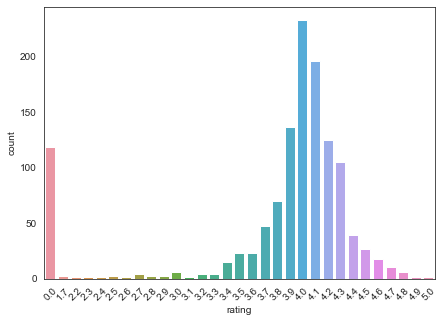

In [33]:
plt.figure(figsize=(7,5))
sns.set_style('white')
sns.countplot(data = data, x ='rating')
plt.xticks(rotation=45)
plt.show()

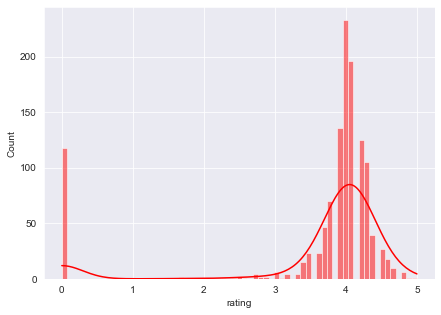

In [34]:
plt.figure(figsize=(7,5))
sns.set_style('dark')
sns.histplot(data=data, x='rating', color='r', kde=True)  
plt.grid(True)
plt.show()

Observation: From the above plot we understand that most restaurants have been rated in the range of 3.9 - 4.3

## ***TIME***

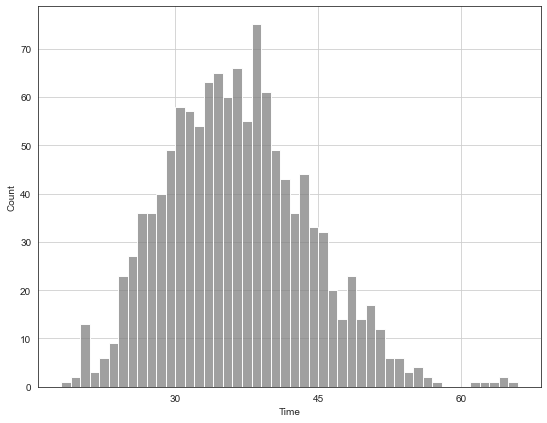

In [35]:
plt.figure(figsize=(9,7))
sns.set_style('white')
ax = sns.histplot(data=data, x='time', color='gray', binwidth=1)
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
plt.xlabel('Time')
plt.grid(True)
plt.show()

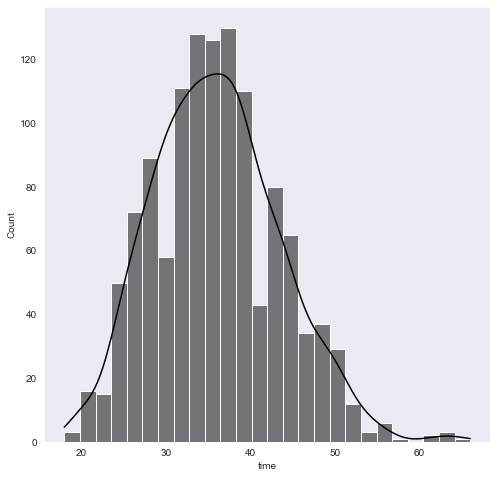

In [36]:
plt.figure(figsize=(8,8))
sns.set_style('dark')
sns.histplot(data['time'],color = 'k', kde=True)
plt.show()

Observation: From the above visuals the food delivery take about 25-40 minutes to reach the customer.

## ***PRICE FOR TWO***

<Figure size 648x360 with 0 Axes>

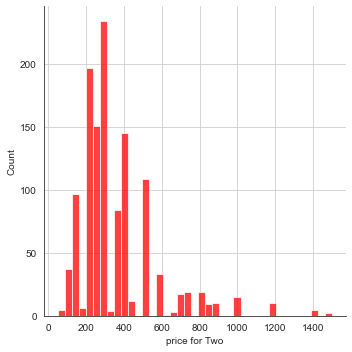

In [37]:
plt.figure(figsize = (9,5))
sns.set_style('white')
sns.displot(x = 'price for Two',data = data,color = 'r')
plt.grid(True)
plt.show()

Observation: From the above plot we can see cost of food is around Rs.300 for two persons.

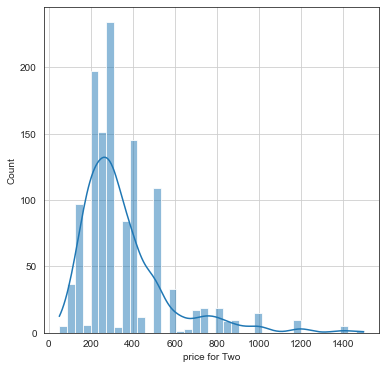

In [38]:
plt.figure(figsize= (6,6))
sns.set_style('white')
sns.histplot(data['price for Two'], kde=True)
plt.grid(True)
plt.show()

Observation: From the above plot we can see Rs.300 in most of the Restaurants for two persons.

## ***Analysis of Columns in the DataFrame***

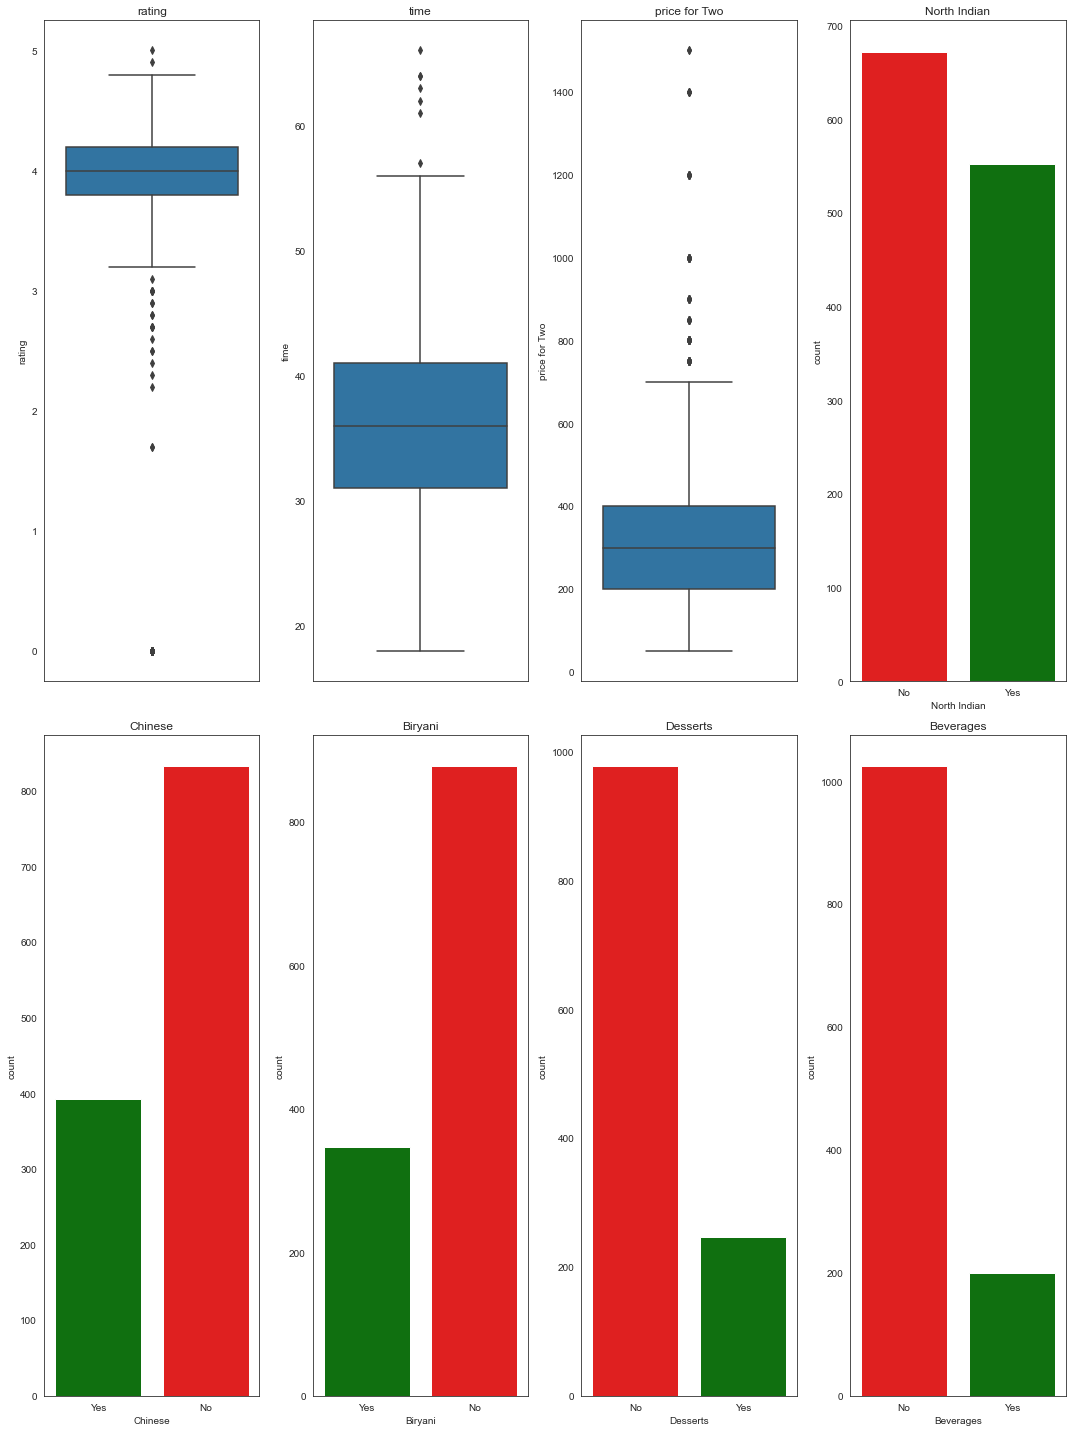

In [39]:
columns_to_plot = data.columns[2:]

# Calculating the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
axes = axes.flatten()
custom_palette = {'Yes': 'green', 'No': 'red'}

# Loop through each column and create the appropriate plot
for i, col in enumerate(columns_to_plot):
    if col in ['rating', 'time', 'price for Two']:
        sns.boxplot(y=data[col], ax=axes[i])
    else:
        sns.countplot(x=data[col], palette=custom_palette, ax=axes[i])
        
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Interpretation: 
* The restaurant ratings are generally high, with most falling around 4.
* Delivery times are mostly consistent, but there are a few extreme cases of very long or very short times.
* Prices for two people can vary greatly, indicating a diverse range of restaurant types from budget to high-end.
* North Indian cuisine and Chinese cuisine is offered by fewer restaurants, which might indicate a gap in the market or a   specific focus on other types of cuisines.

# ***Bivariate***

### ***Numerical & Categorical Values***

In [40]:
data.groupby('North Indian').mean()

,rating,time,price for Two
North Indian,,,
No,3.91622,35.316964,330.043155
Yes,3.28587,36.838768,382.784420


In [41]:
data.groupby('Chinese').mean()

,rating,time,price for Two
Chinese,,,
No,3.675601,35.743990,326.153846
Yes,3.539286,36.553571,412.566327


In [42]:
data.groupby('Biryani').mean()

,rating,time,price for Two
Biryani,,,
No,3.693957,35.654504,328.197263
Yes,3.475216,36.884726,418.608069


<Figure size 432x432 with 0 Axes>

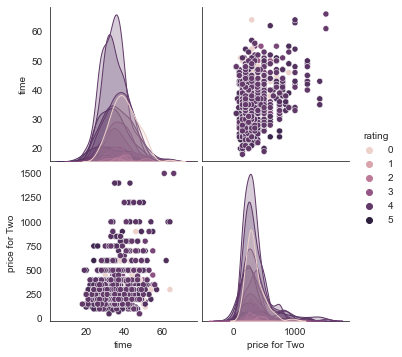

In [43]:
plt.figure(figsize= (6,6))
sns.pairplot(data=data,hue ='rating')
plt.show()

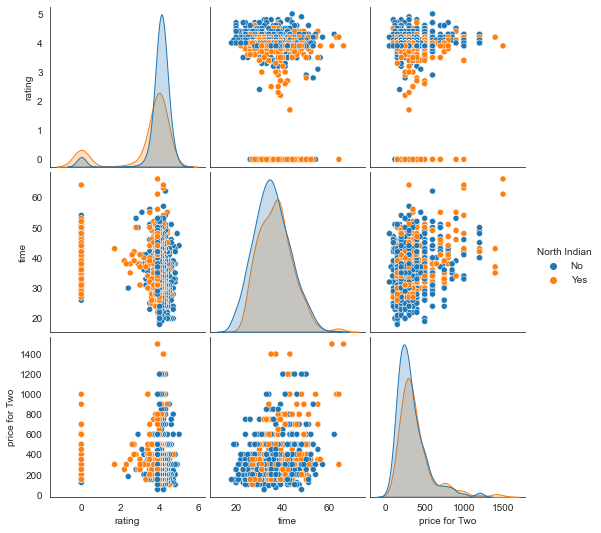

In [44]:
sns.pairplot(data=data,hue ='North Indian')
plt.show()

Observation : From the above graph we can say that quite a few restaurants serve North Indian food.

## ***Does Price have influence over Other columns***

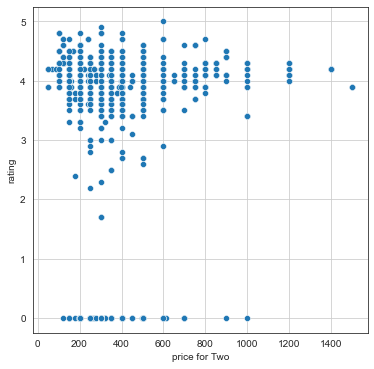

In [45]:
plt.figure(figsize=(6, 6))
sns.set_style('white')
sns.scatterplot(x='price for Two', y='rating', data=data)
plt.grid(True)
plt.show()

Observation: The scatter plot shows no apparent correlation between the price for two and the restaurant ratings.

<Figure size 432x360 with 0 Axes>

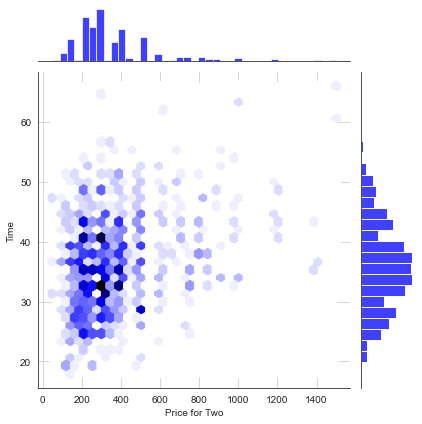

In [46]:
plt.figure(figsize=(6, 5))
sns.set_style('white')
sns.jointplot(x='price for Two', y='time', data=data, kind='hex', color='blue')
plt.xlabel('Price for Two')
plt.ylabel('Time')
plt.grid(True)
plt.show()


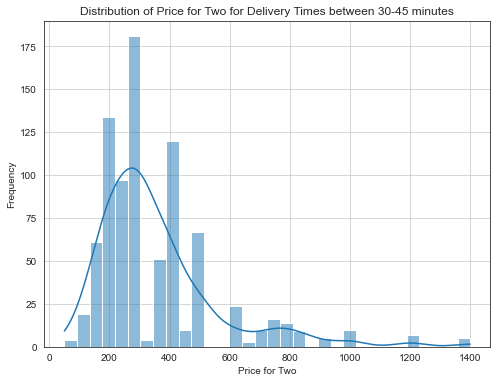

In [47]:
filtered_data = data[(data['time'] >= 30) & (data['time'] <= 45)]

plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['price for Two'], kde=True)
plt.title('Distribution of Price for Two for Delivery Times between 30-45 minutes')
plt.xlabel('Price for Two')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Observation: There are no relations between the delivery time and the price.

## ***1. Which cuisine type is the most popular among Restaurants?***


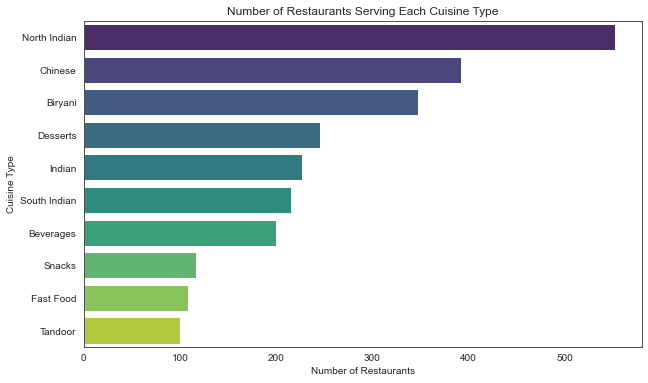

In [48]:
cuisine_counts = data['cuisine'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Number of Restaurants Serving Each Cuisine Type')
plt.show()

## ***2. What is the distribution of restaurant ratings?***

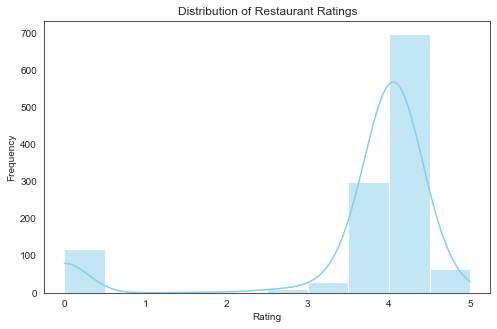

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], kde=True, color='skyblue', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

## ***3. How does the average price for two vary among different restaurant ratings?***

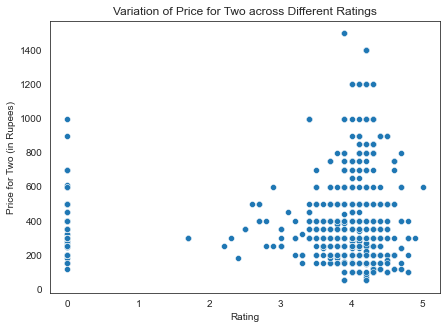

In [50]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='rating', y='price for Two', palette='Set2')
plt.xlabel('Rating')
plt.ylabel('Price for Two (in Rupees)')
plt.title('Variation of Price for Two across Different Ratings')
plt.show()

## ***4. What is the average delivery time for different cuisine types?***

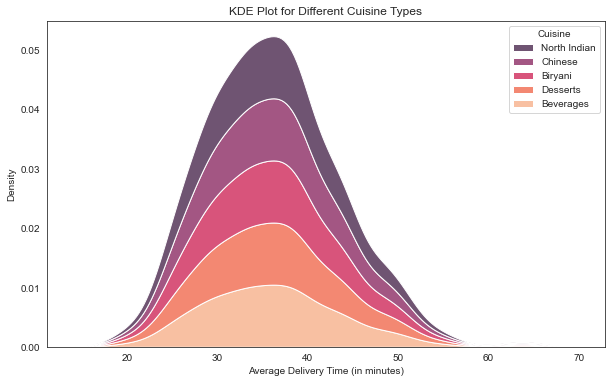

In [51]:
filtered_data = data[['North Indian', 'Chinese', 'Biryani', 'Desserts', 'Beverages', 'time']]
filtered_data = filtered_data[filtered_data[['North Indian', 'Chinese', 'Biryani', 'Desserts', 'Beverages']].eq('Yes').any(axis=1)]
filtered_data['time'] = pd.to_numeric(filtered_data['time'], errors='coerce')
melted_data = pd.melt(filtered_data, id_vars=['time'], value_vars=['North Indian', 'Chinese', 'Biryani', 'Desserts', 'Beverages'], var_name='Cuisine', value_name='Serves')

plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_data, x='time', hue='Cuisine', fill=True, palette='rocket', multiple='stack', legend=True)
plt.xlabel('Average Delivery Time (in minutes)')
plt.ylabel('Density')
plt.title('KDE Plot for Different Cuisine Types')
plt.show()

## ***5. What are the top 5 most common cuisine combinations?***

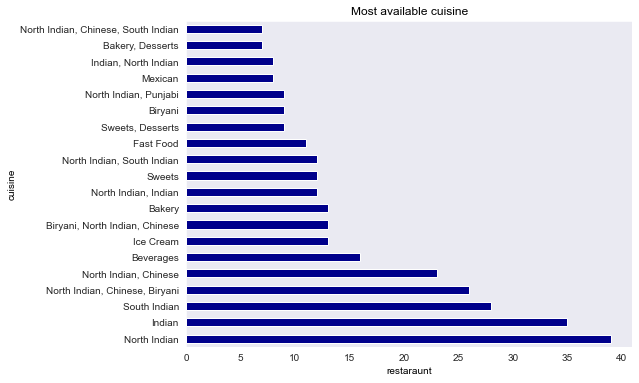

In [52]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
pd.Series(data['cuisine'].value_counts(ascending = False)[:20].plot(kind = 'barh',color = 'darkblue'))
plt.title ('Most available cuisine',color = 'k')
plt.xlabel('restaraunt',color = 'k')
plt.ylabel('cuisine',color = 'k')
plt.show()

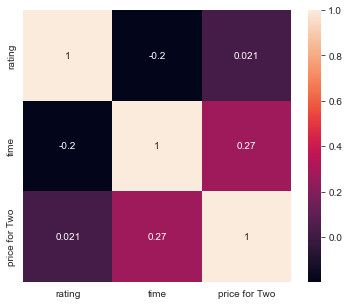

In [53]:
plt.figure(figsize = (6,5))
SWIGGY = data.corr()
sns.heatmap(SWIGGY,annot=True)
plt.show()

Observation: 
  - rating and time ends up at -0.2 which means they have low cor. 
  - price for two with rating marked at 0.021 along with 0.27 in time which is a positive marking.

## ***Insights***

- North Indian cuisine appears frequently, it suggests a preference for North Indian food.
- Analyzing the average price for two at different restaurants can reveal affordability preferences among customers. Higher      prices may indicate a preference for premium dining experiences, while lower prices may suggest value-consciousness.
- Looking at the availability of beverages and desserts can indicate customer preferences for additional food items beyond main courses.
- Examining the distribution of restaurant ratings can provide insights into customer satisfaction levels. Higher ratings indicate a positive customer experience, reflecting preferences for certain restaurants.

## ***Business Insights***

- Focus on promoting these top-rated restaurants in marketing campaigns to attract more customers by highlighting quality and positive reviews.
- The majority of food deliveries are completed within 30 to 40 minutes. Optimize delivery operations to maintain or reduce delivery times further, enhancing customer satisfaction.
-  For less represented cuisines like Italian and Continental, create targeted promotions to gauge and possibly increase customer interest.
- There are fewer restaurants serving Biryani compared to other cuisines. Given the popularity of Biryani, encouraging more restaurants to include it in their menu could attract Biryani lovers and potentially increase order volume.